In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.shape

(400, 5)

In [7]:
df.isna()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])


In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [10]:
X = df[['Gender', 'Age', 'EstimatedSalary']]  # Features
y = df['Purchased']  # Target variable

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scale the numeric features (Age and EstimatedSalary) for better performance
scaler = StandardScaler()
X_train[['Age', 'EstimatedSalary']] = scaler.fit_transform(X_train[['Age', 'EstimatedSalary']])
X_test[['Age', 'EstimatedSalary']] = scaler.transform(X_test[['Age', 'EstimatedSalary']])

In [17]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

In [20]:
# Extract TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Compute additional metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = (FP + FN) / (TP + TN + FP + FN)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

Confusion Matrix:
[[50  2]
 [ 7 21]]
True Positives (TP): 21
True Negatives (TN): 50
False Positives (FP): 2
False Negatives (FN): 7
Accuracy: 0.8875
Error Rate: 0.1125
Precision: 0.9130
Recall: 0.7500


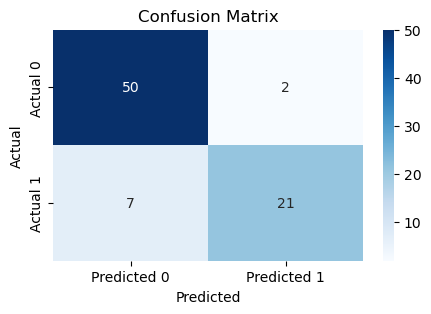

In [21]:
# Display the metrics in the terminal
print(f"Confusion Matrix:\n{cm}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()